In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
np.random.seed(0)

In [3]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['Species']=pd.Categorical.from_codes(iris.target,
                                       iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['is_train'] = np.random.uniform(0,1,len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [8]:
train,test = df[df['is_train'] == True], df[df['is_train']==False]
print('Number of observations inthe training data:', len(train))
print('Number of observations inthe test data:', len(test))

Number of observations inthe training data: 118
Number of observations inthe test data: 32


In [9]:
features=df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [10]:
y=pd.factorize(train['Species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [11]:
clf=RandomForestClassifier(n_jobs = 2, random_state=0)
clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [12]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
test[features]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
10,5.4,3.7,1.5,0.2
13,4.3,3.0,1.1,0.1
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
20,5.4,3.4,1.7,0.2
21,5.1,3.7,1.5,0.4
23,5.1,3.3,1.7,0.5


In [14]:
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [15]:
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [16]:
clf.predict_proba(test[features])[10:20]

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04]])

In [17]:
preds=iris.target_names[clf.predict(test[features])]
preds[0:25]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica'], dtype='<U10')

In [18]:
test['Species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: Species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [19]:
pd.crosstab(test['Species'],preds,rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [20]:
preds=iris.target_names[clf.predict(test[features])]

In [21]:
preds=iris.target_names[clf.predict([[5.0, 3.6,1.4,2.0], [5.0, 3.6,1.4,2.0]])]
preds

array(['setosa', 'setosa'], dtype='<U10')

### Random Forest Explained

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset= pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\Social_Network_Ads.csv')

dataset.drop(['Gender','User ID'], axis = 1, inplace = True)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [25]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
dataset.shape

(400, 3)

In [27]:
dataset.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [29]:
X_train.shape

(300, 2)

In [30]:
X_test[:3]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000]], dtype=int64)

In [31]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [32]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [33]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
print(X_train[0:10])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [35]:
print(X_test[0:5])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


In [36]:
classiier=RandomForestClassifier(n_estimators=5, criterion='entropy',random_state=0)
classiier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [41]:
print(classiier.predict(sc.transform([[30,87000]])))

[0]


In [37]:
y_pred=classiier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[62  6]
 [ 3 29]]


0.91

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [41]:

import PIL
import pydotplus
from glob import glob
from IPython.display import display,Image
from sklearn.tree import export_graphviz

In [42]:
def save_trees_as_png(clf,iteration, feature_name,target_name):
    file_name = 'Purchased_' + str(iteration) + '.png'
    dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names = feature_name,
    class_names=target_name,
    rounded = True,
    proportion = False,
    precision = 2,
    filled = True
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print('Decision Tree {} saved as png file'.format(iteration + 1))

In [43]:
col=dataset.columns.tolist()
feature_names = col[:2]
target_names = col[2]

In [44]:
target_names

'Purchased'

In [45]:
classiier.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=441365315)]

In [46]:
classiier.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=209652396)

In [47]:
for i in range(len(classiier.estimators_)):
    save_trees_as_png(classiier.estimators_[i], i, feature_names, target_names)

Decision Tree 1 saved as png file
Decision Tree 2 saved as png file
Decision Tree 3 saved as png file
Decision Tree 4 saved as png file
Decision Tree 5 saved as png file


In [48]:
images = [PIL.Image.open(f) for f in glob('./*.png')]

In [49]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2271x1688 at 0x27DE220FB20>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2215x2323 at 0x27DE2535FD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2974x2005 at 0x27DE25CB550>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1703x2323 at 0x27DE25CB310>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2543x1529 at 0x27DE25CB4F0>]

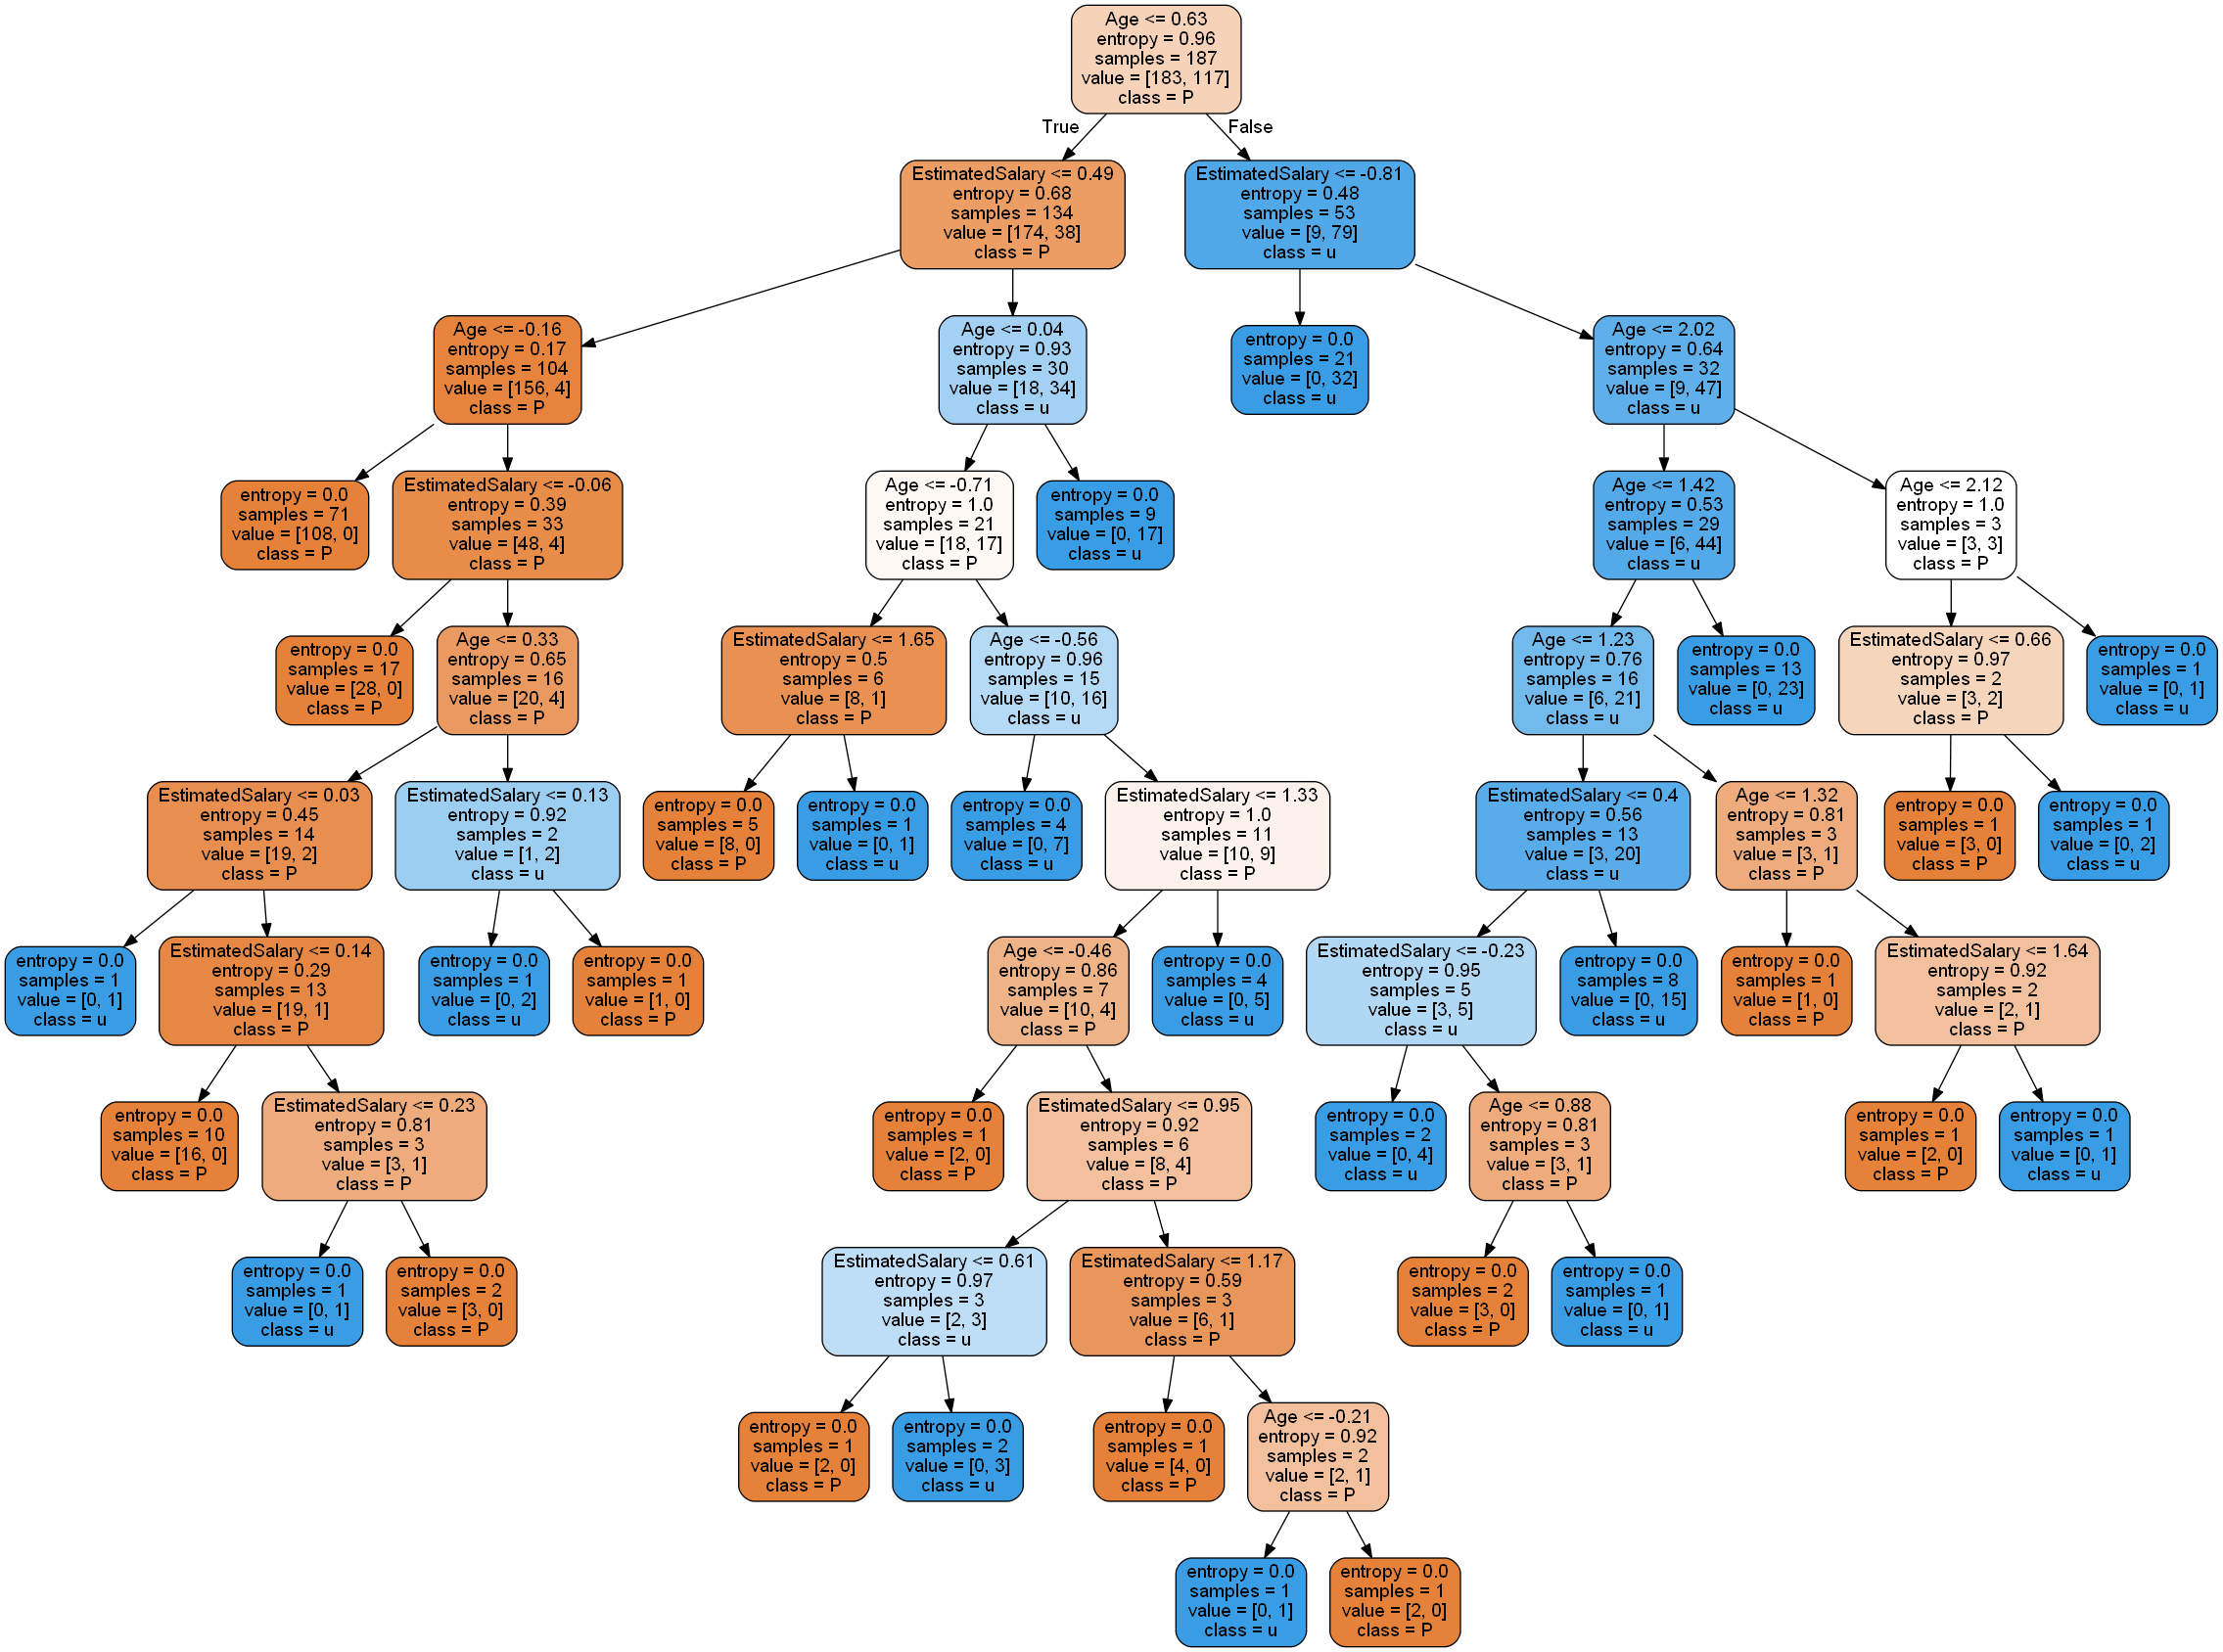

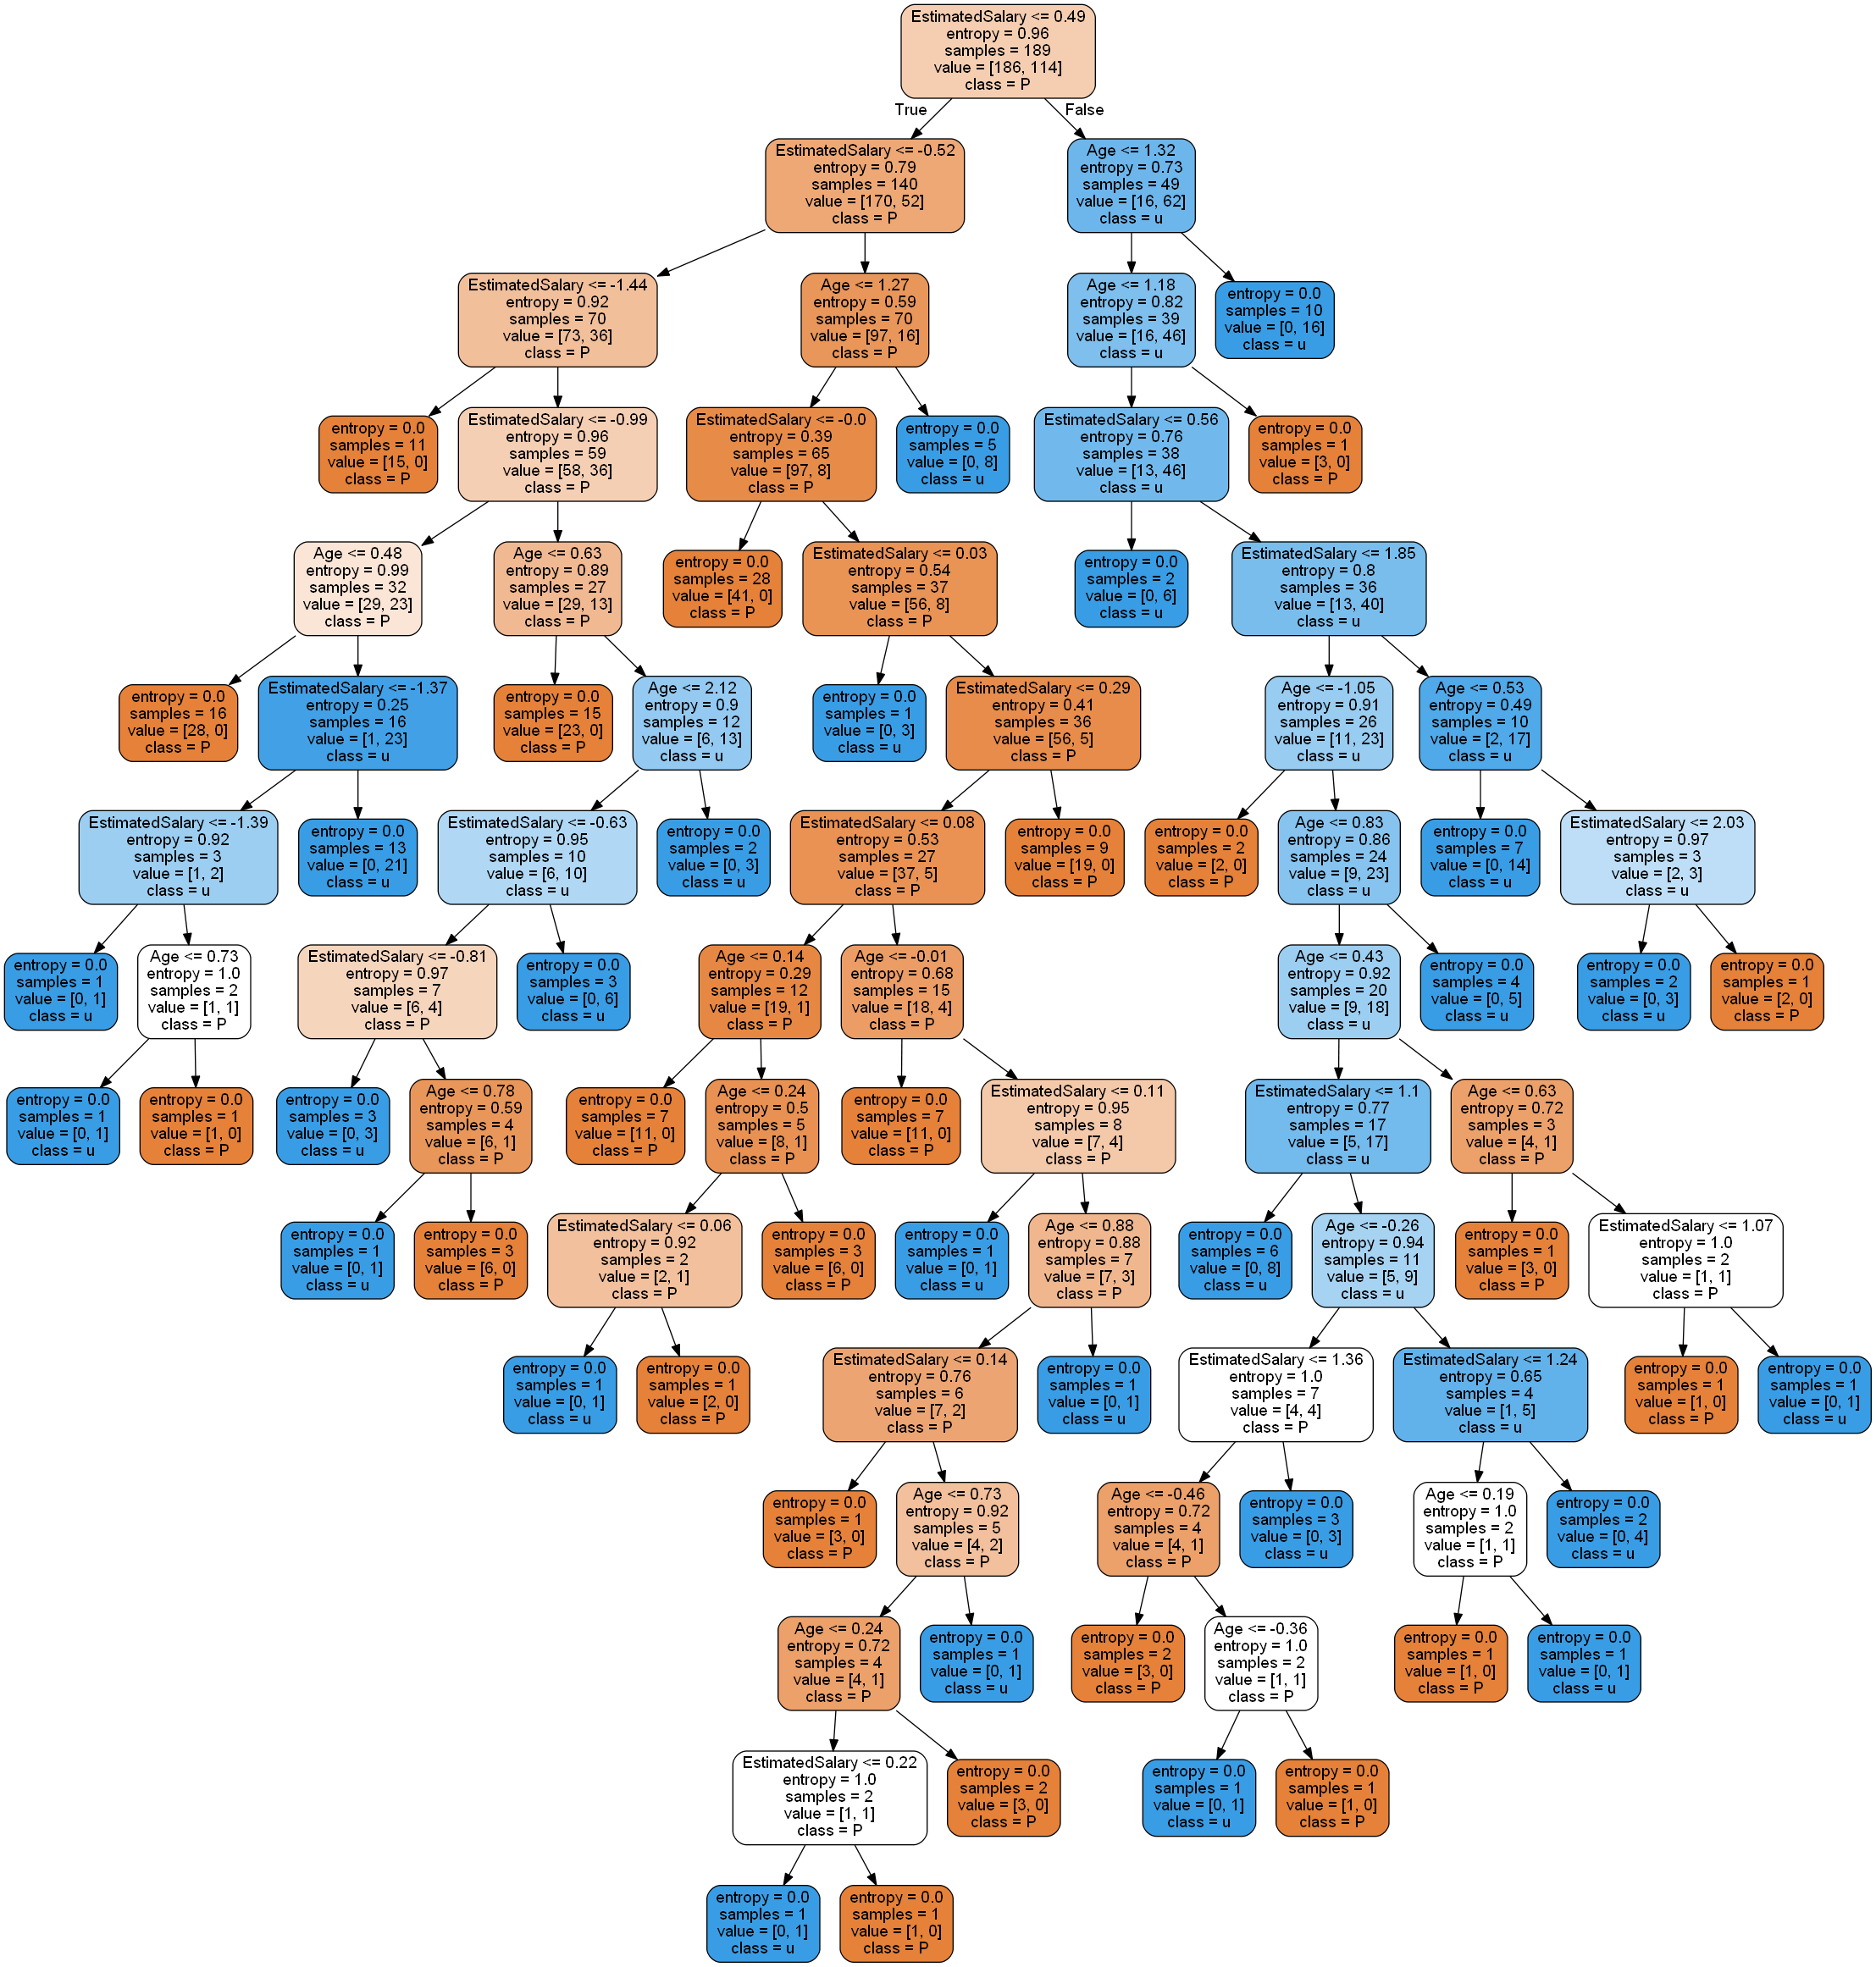

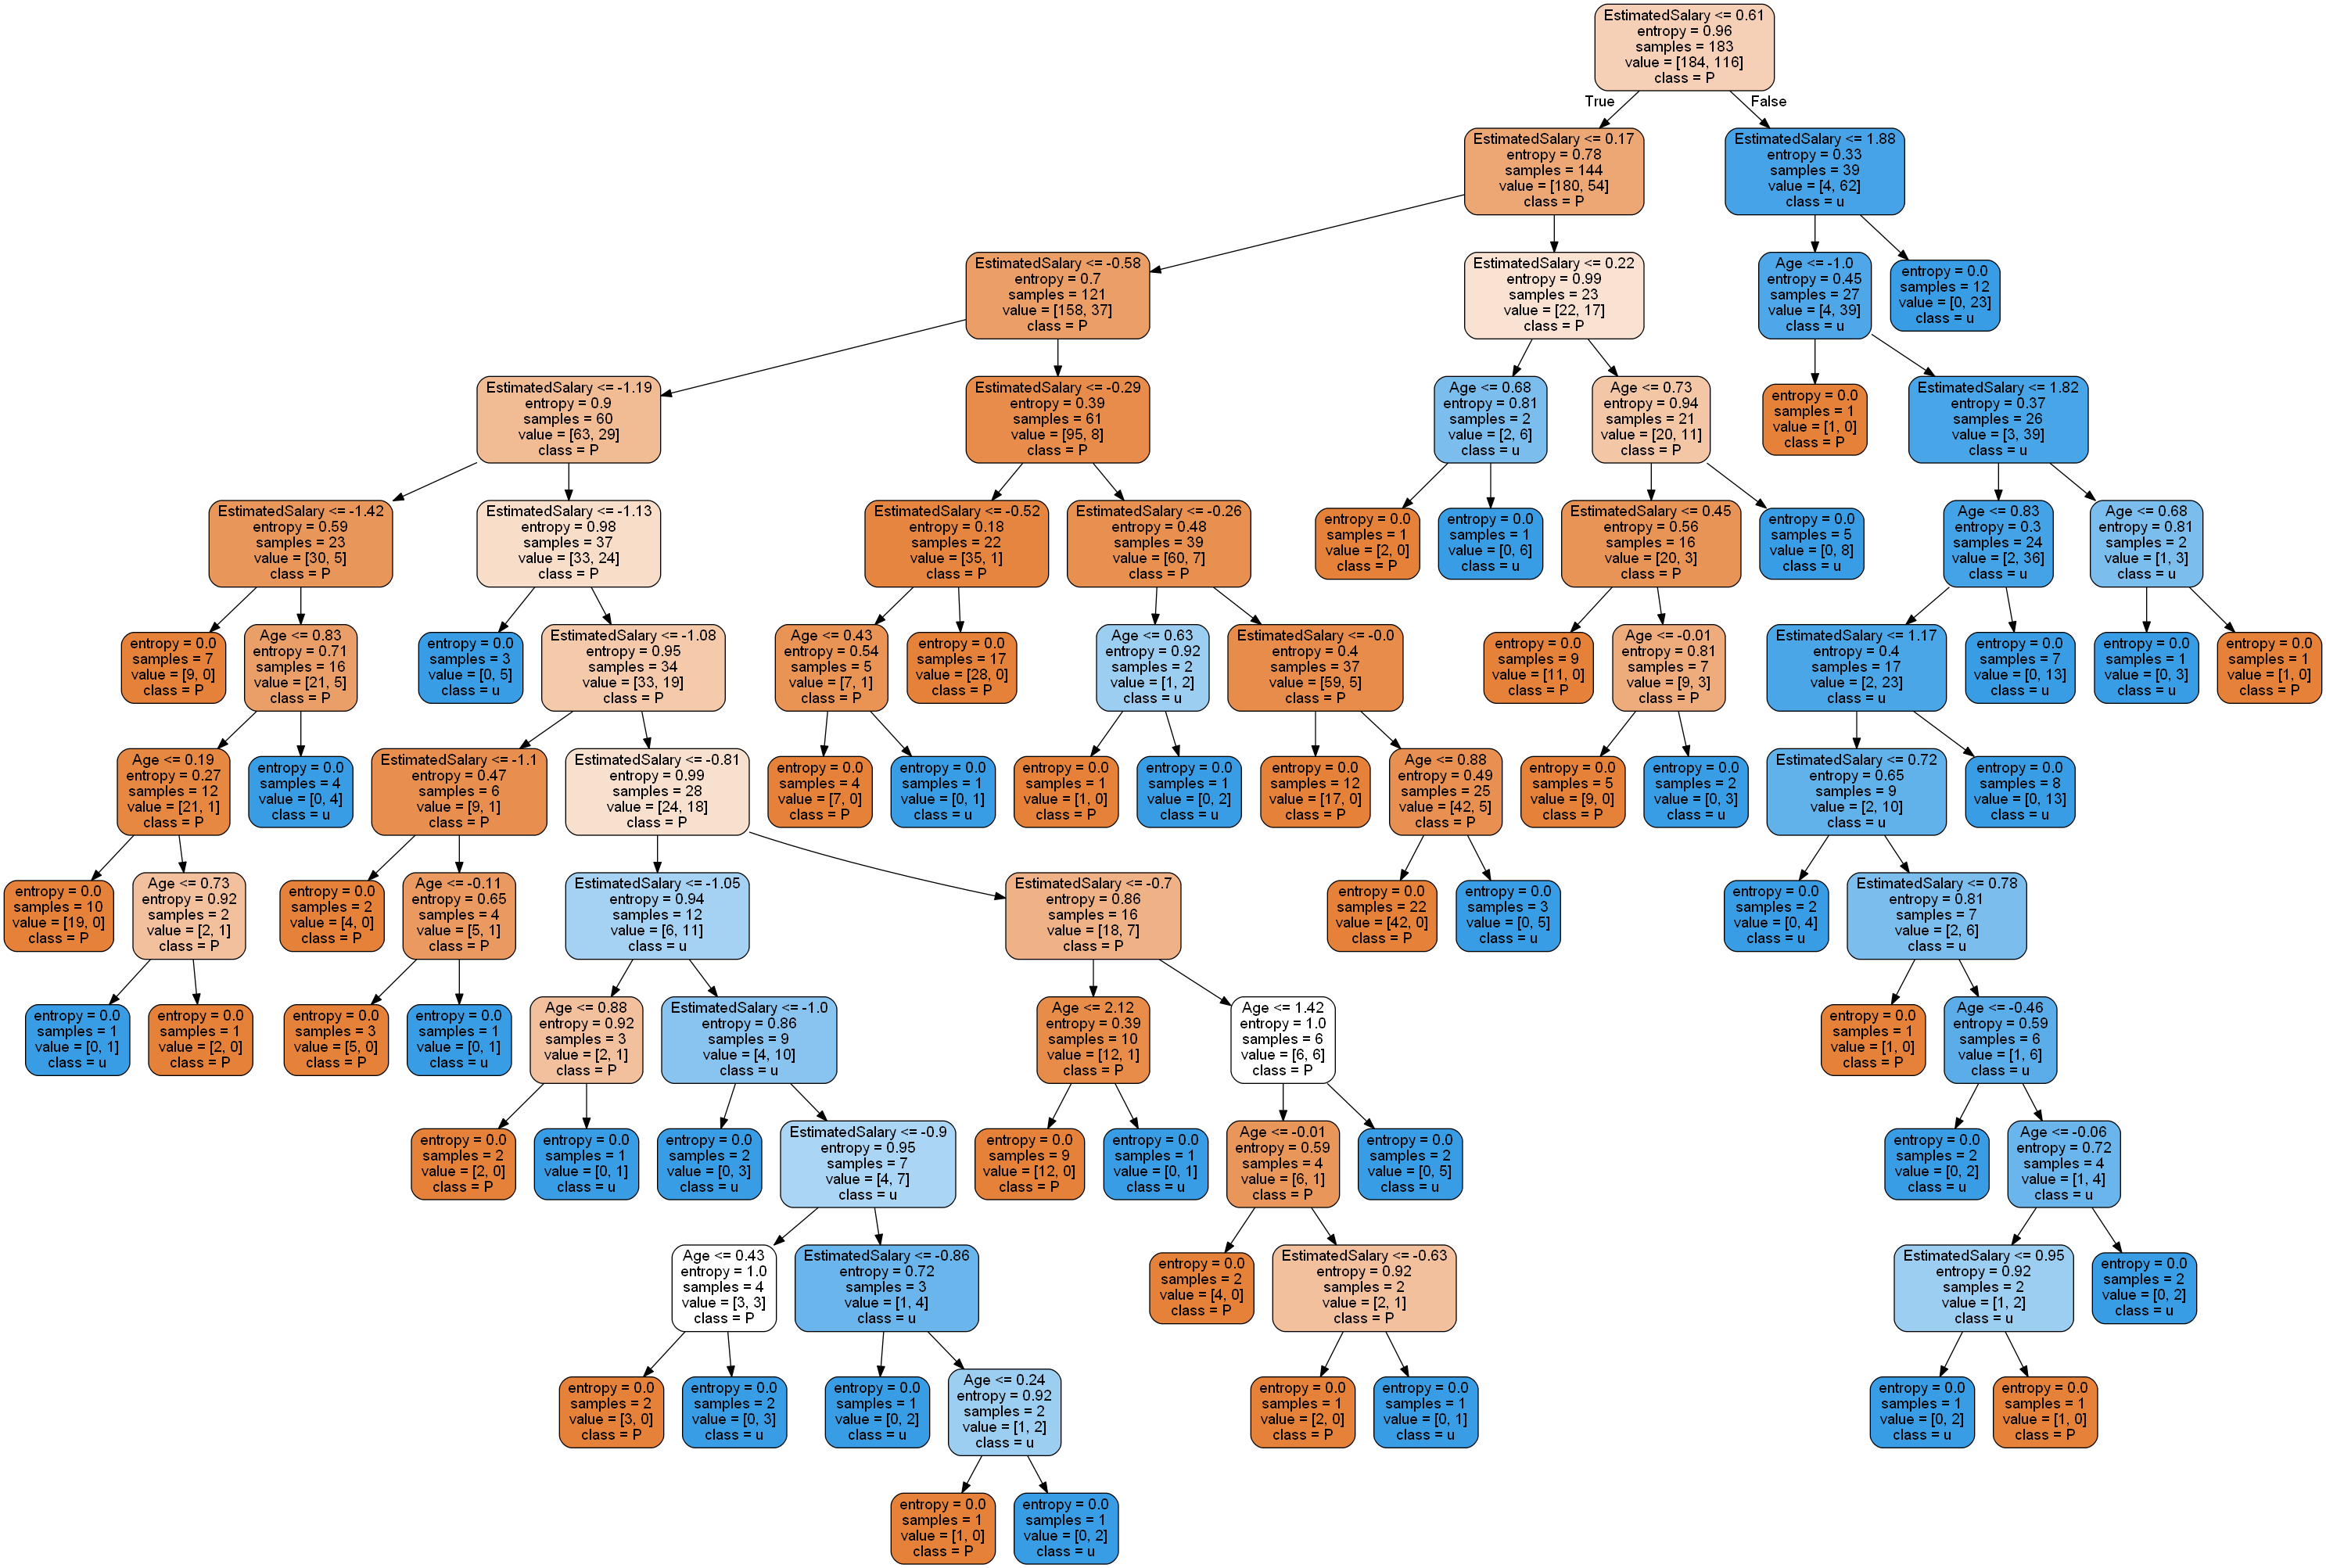

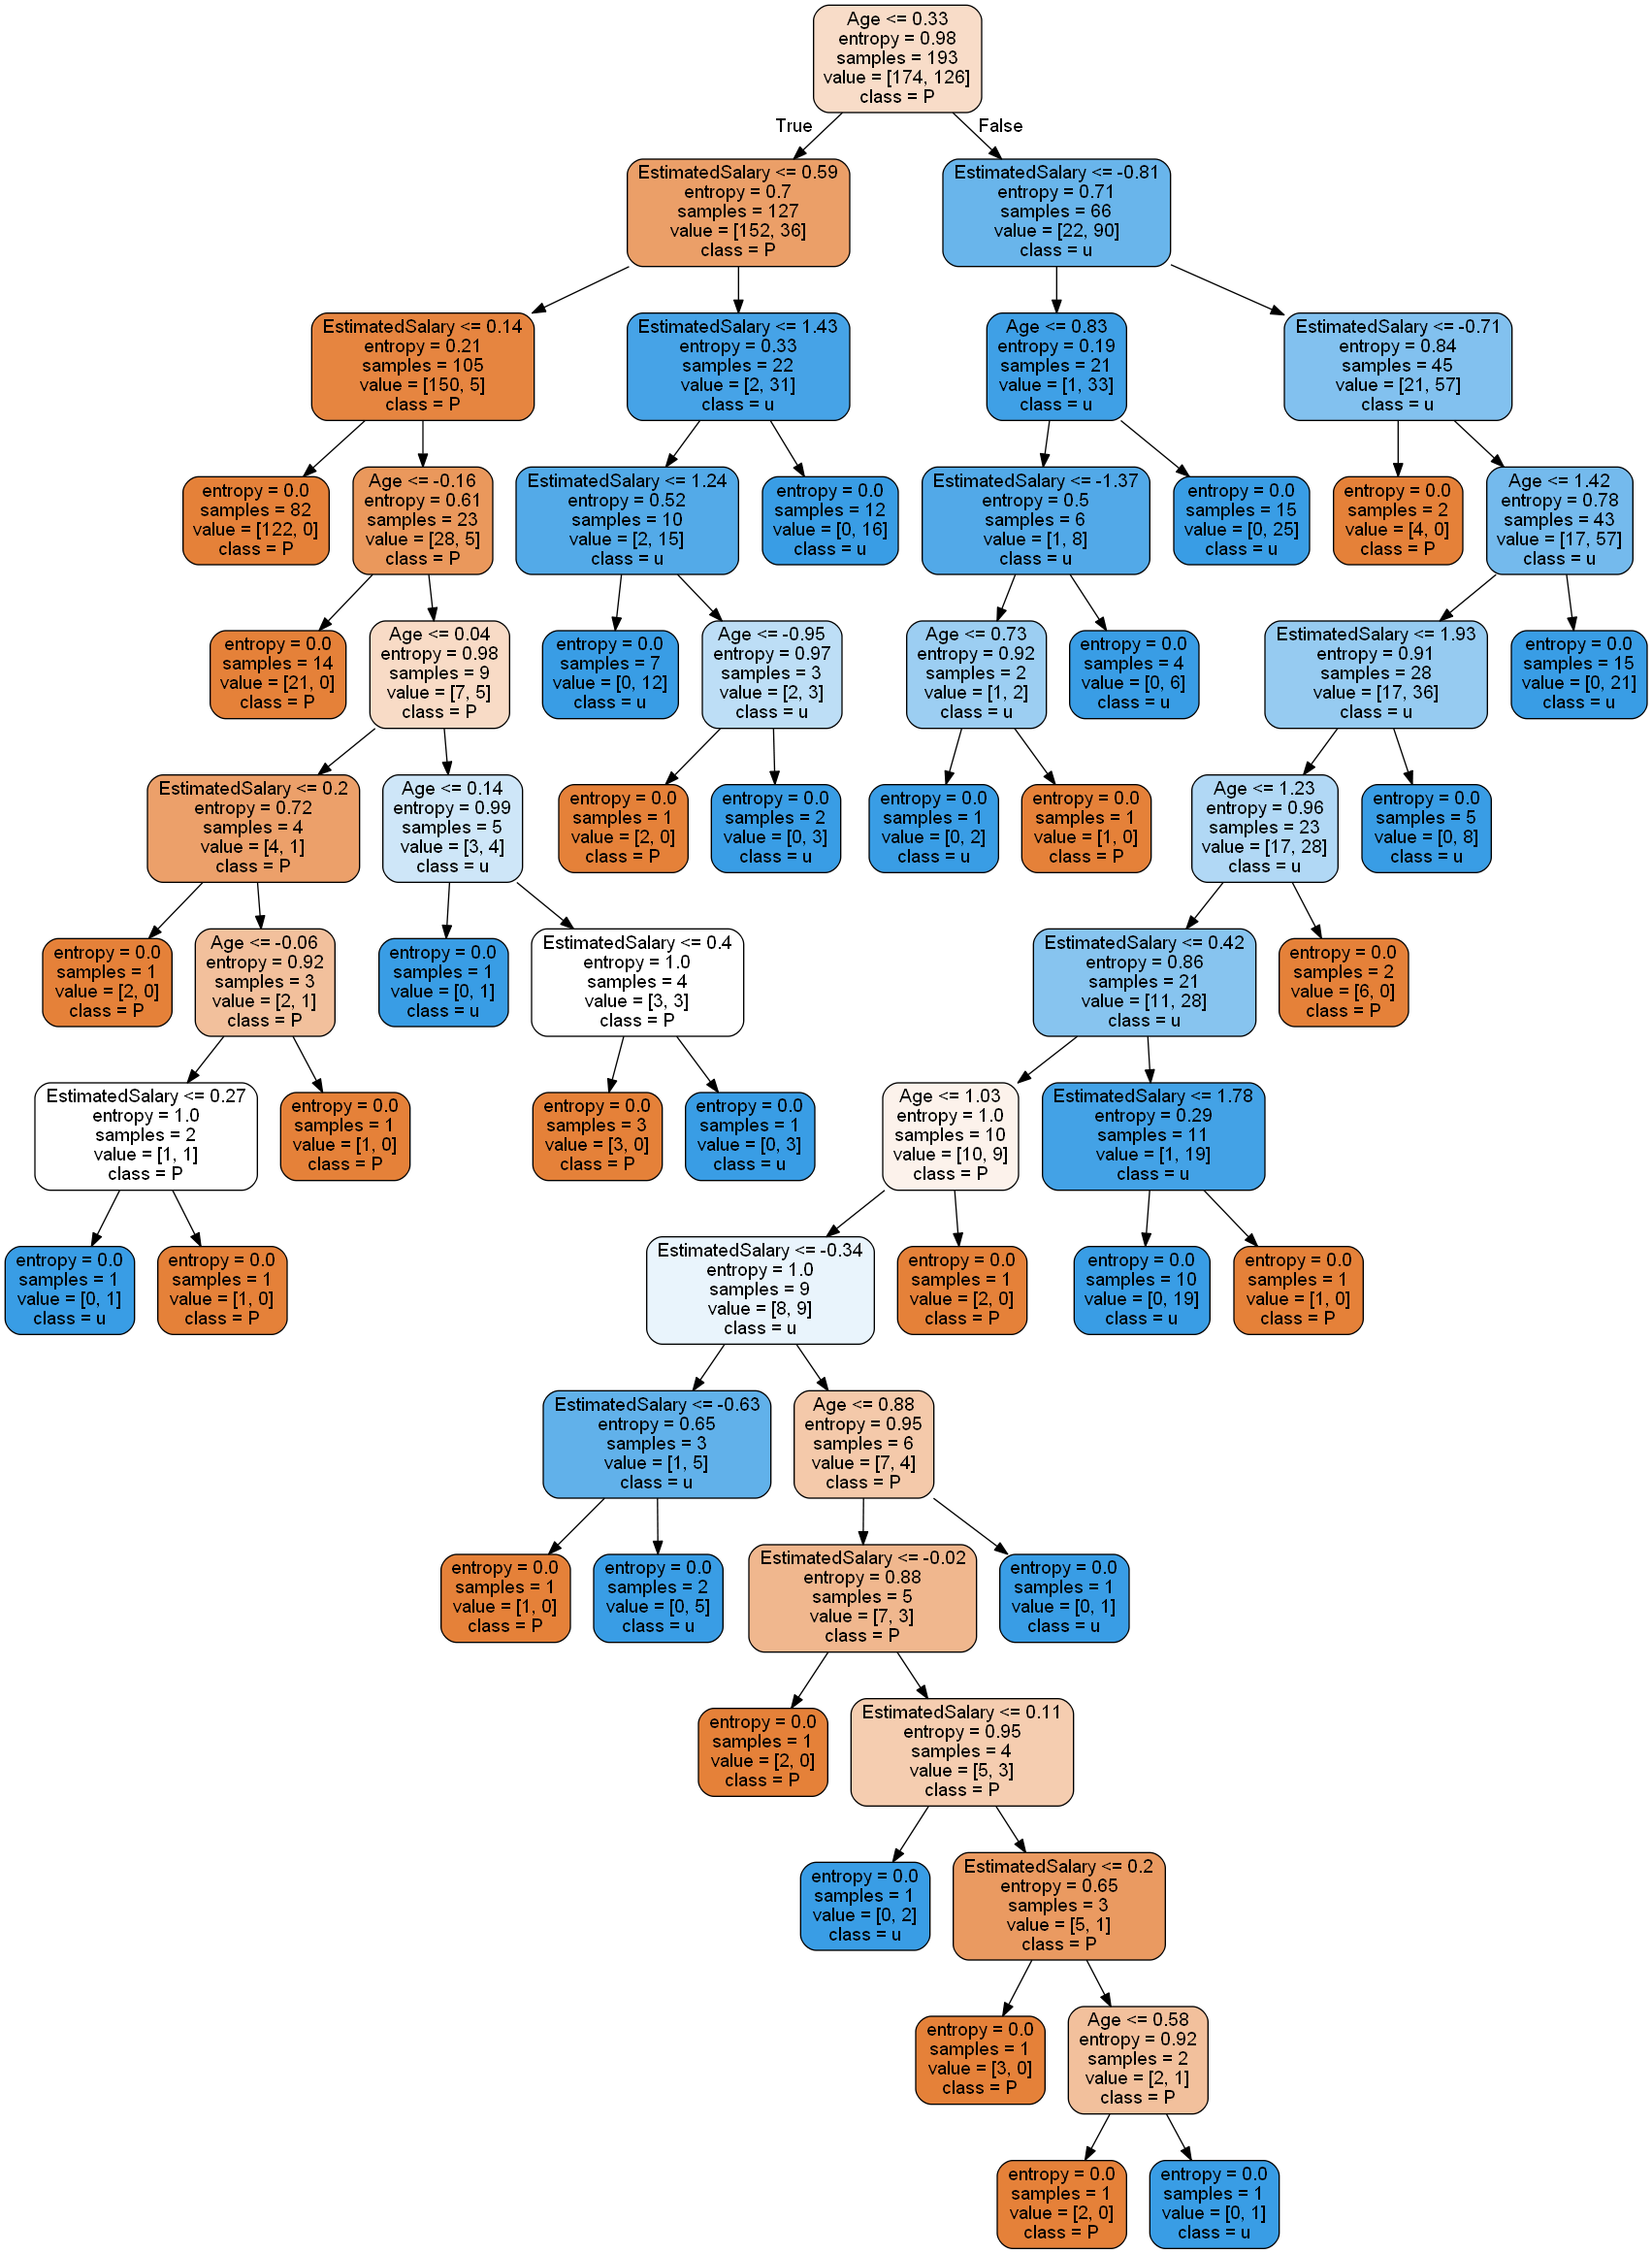

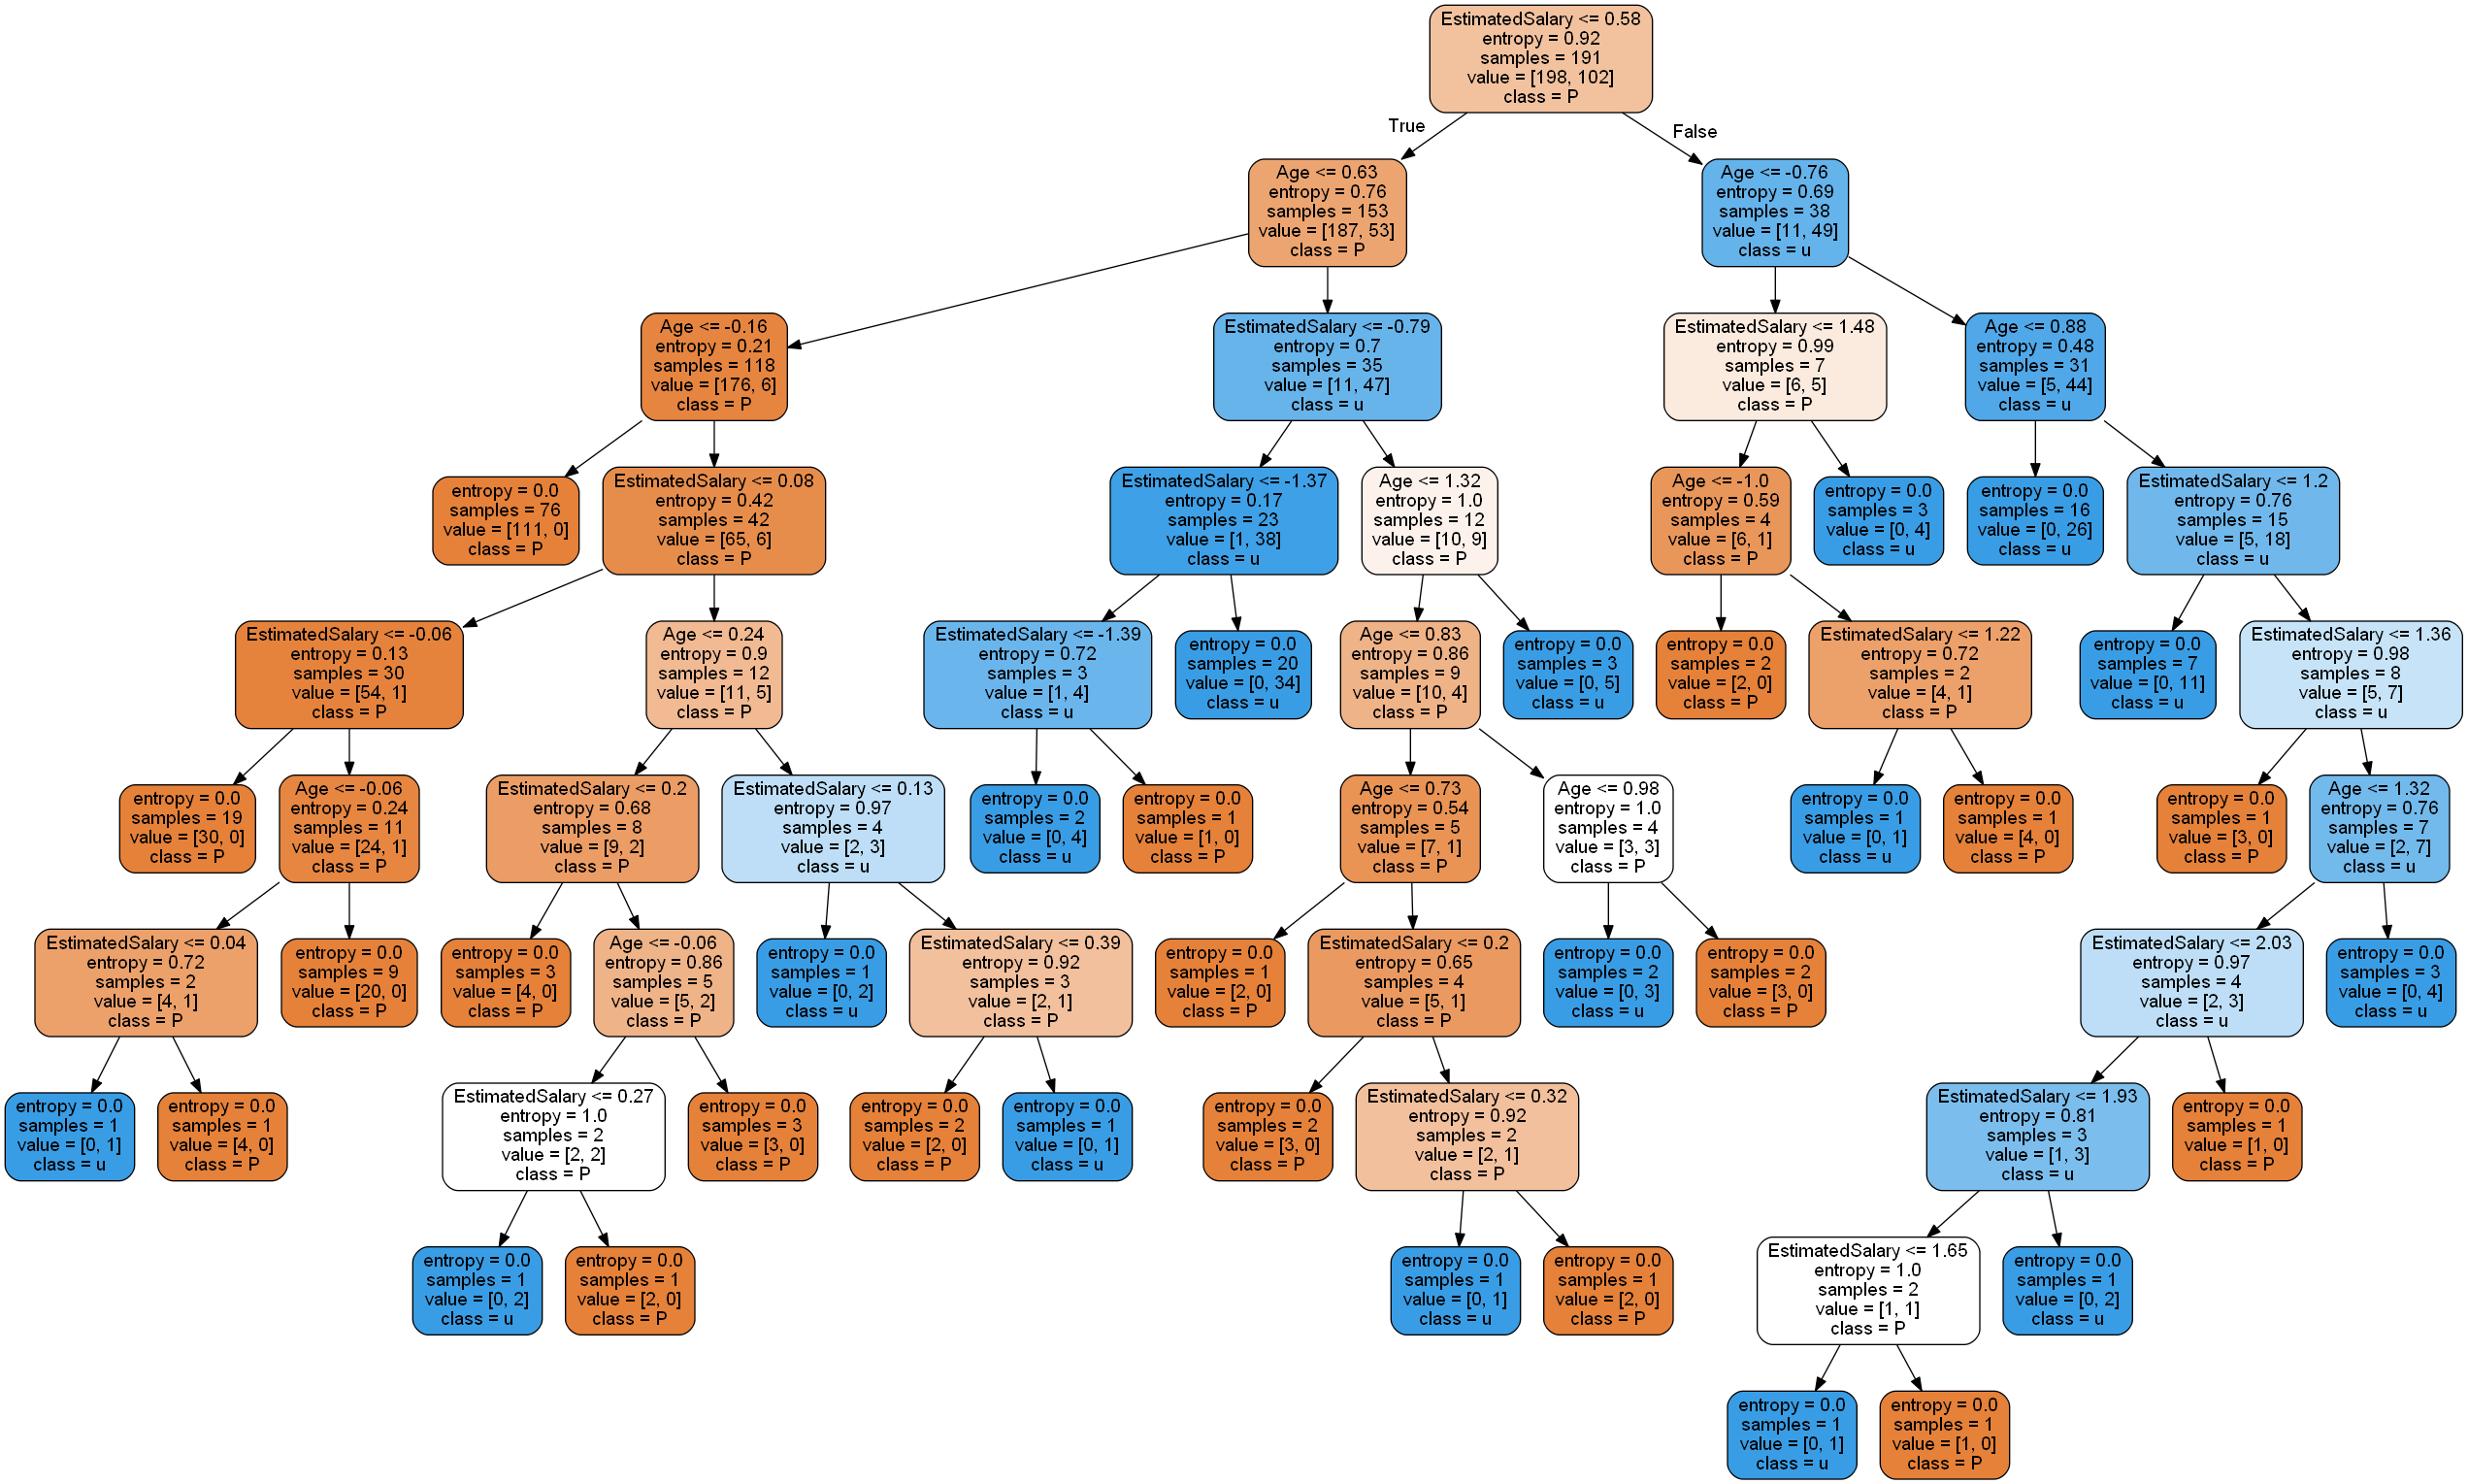

In [50]:
for im in images:
    display(Image(filename=im.filename, retina=True))